In [1]:
%matplotlib inline
import numpy as np
from scipy.special import jn, jn_zeros, yn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import Image, display
from ipywidgets import interact
# Positions on the drum surface are specified in polar co-ordinates



# Cylindrical harmonics (modes)  
  
Harmonics on circular membranes are described by Bessel functions with integer order. A common example is the vibrational modes of a drum. In this notebook, the solutions to the differntial Bessel equation for a drum are explored. These modes are very simillar to those for the modes found in an optical fibre. 

In [2]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

In [3]:
%%html
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>

In [4]:
def displacement(l, m, r, theta):
    """
    Calculate the displacement of the drum membrane at (r, theta; t=0)
    in the normal mode described by integers n >= 0, 0 < m <= mmax.

    """
    mmax = 5
    # Pick off the mth zero of Bessel function Jn
    k = jn_zeros(l, mmax+1)[m]
    return np.sin(l*theta) * jn(l, r*k)

def fig(l, m):
    m-=1
    r = np.linspace(0, 1, 100)
    theta = np.linspace(0, 2 * np.pi, 100)
    # Create arrays of cartesian co-ordinates (x, y) ...
    x = np.array([rr*np.cos(theta) for rr in r])
    y = np.array([rr*np.sin(theta) for rr in r])
    z = np.array([displacement(l, m, rr, theta) for rr in r])
    fig = plt.figure()
    CS = plt.contour(x, y, z)
    plt.clabel(CS, inline=1, fontsize=10)
    #ax = fig.gca(projection='3d')
    #ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
    plt.axes().set_aspect('equal', 'datalim')

    plt.show()

Friedrich Wilhelm Bessel a German mathematician developed the differential Bessel equation to describe the vibrations on a circular membrane.  
  
## The differential Bessel equation  
  
$$ \dfrac{\partial^{2}R(r)}{\partial r^{2}}+\dfrac{1}{r}\dfrac{\partial R(r)}{\partial r}+\left(k^{2}-\dfrac{l^{2}}{r^{2}}\right)R(r)=0 $$  
  
where $r$ is the radius and $k= \omega/v$.  
  
This has general solution:  
  
$$ R(r) = AJ_{l}(kr) + BY_{l}(kr) $$  
  
where $J$ and $Y$ are Bessel functions of order $l$. These are plotted below  
  
  

  

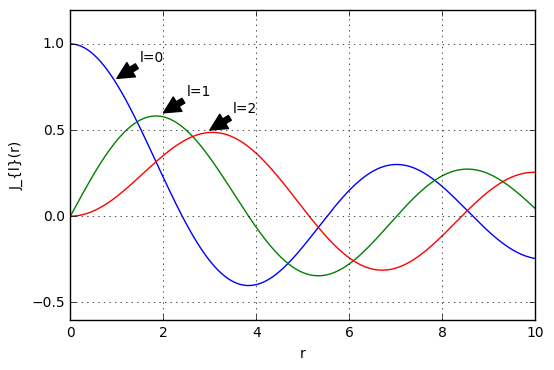

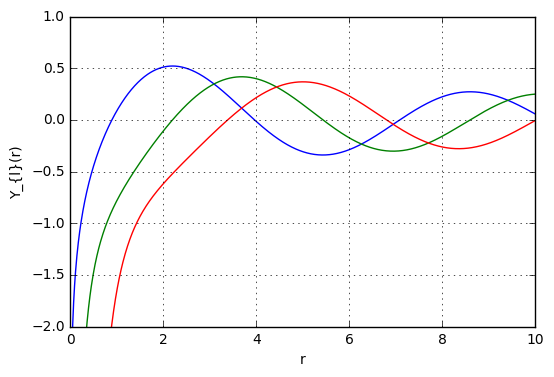

In [5]:

x = np.arange(0,10,0.01)

y = jn(0,x)
y2 = jn(1,x)
y3 = jn(2,x)
plt.figure(1)
plt.plot(x,y, x,y2, x,y3)
plt.grid()
plt.xlabel('r')
plt.ylabel('J_{l}(r)')
plt.annotate('l=0', xy=(1, 0.8), xytext=(1.5, 0.9),
            arrowprops=dict(facecolor='black', shrink=0.001),
            )
plt.annotate('l=1', xy=(2, 0.6), xytext=(2.5, 0.7),
            arrowprops=dict(facecolor='black', shrink=0.001),
            )
plt.annotate('l=2', xy=(3, 0.5), xytext=(3.5, 0.6),
            arrowprops=dict(facecolor='black', shrink=0.001),
            )
yk = yn(0,x)
yk2 = yn(1,x)
yk3 = yn(2,x)

plt.figure(2)
plt.plot(x, yk, x,yk2, x,yk3)


plt.grid()
plt.ylim(-2, 1)
#plt.xlim(0, 3)
plt.xlabel('r')
plt.ylabel('Y_{l}(r)')
plt.show()

It is obvous that the $Y$-type Bessel function cannot be a solution due to the fact that it diverges when $r$ approaches $0$. Therefore $B=0$ and the oscillations are described purely by a $J$-type Bessel function.

# Solutions for a circular membrane  
  
Below is some interactive code that you can play with to show the effect of mode order on the oscillation. Hopefully this will make things a little more intuitive for you.

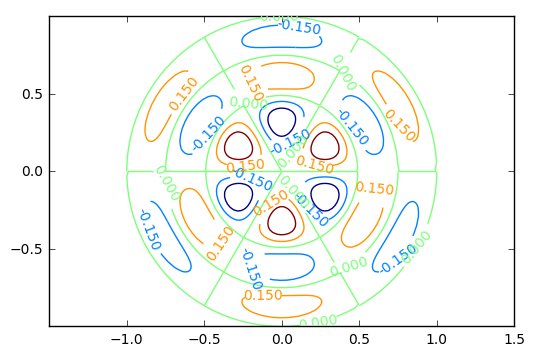

<function __main__.fig>

In [6]:
interact(fig, l =(1,5,1), m = (1,5,1))